In [12]:
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

In [3]:
titanic_data = pd.read_csv("train.csv")

In [4]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived

In [6]:
X = pd.get_dummies(X)

In [7]:
X = X.fillna({'Age': X.Age.median()})

In [8]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [31]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [32]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

[Text(0.6157490974729242, 0.975, 'Sex_female <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(0.38966606498194944, 0.925, 'Fare <= 26.269\nentropy = 0.699\nsamples = 577\nvalue = [468, 109]'),
 Text(0.19133574007220217, 0.875, 'Age <= 13.5\nentropy = 0.558\nsamples = 415\nvalue = [361, 54]'),
 Text(0.06678700361010831, 0.825, 'SibSp <= 2.0\nentropy = 0.567\nsamples = 15\nvalue = [2, 13]'),
 Text(0.05956678700361011, 0.775, 'Age <= 10.0\nentropy = 0.371\nsamples = 14\nvalue = [1, 13]'),
 Text(0.052346570397111915, 0.725, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.06678700361010831, 0.725, 'Fare <= 15.015\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.05956678700361011, 0.675, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0740072202166065, 0.675, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.0740072202166065, 0.775, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.315884476534296, 0.825, 'Embarked_C <= 0.5\nentropy = 0.477\

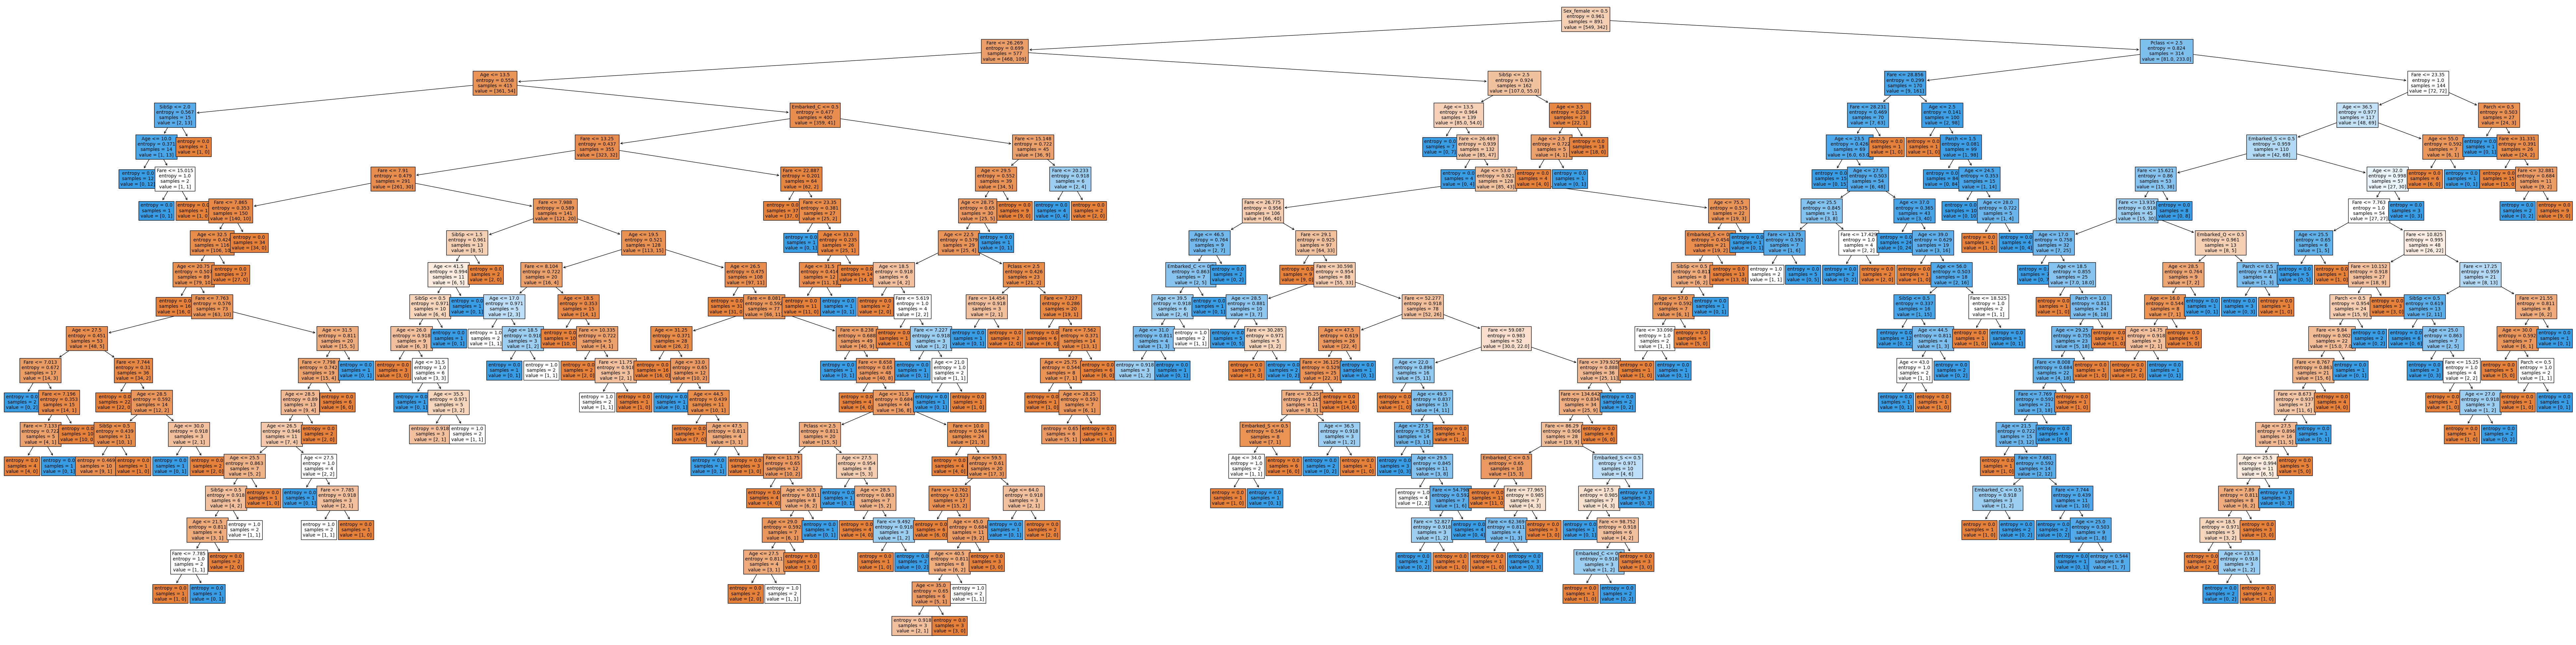

In [33]:
plt.figure(figsize=(100, 25))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
clf.score(X,y)

In [35]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [36]:
clf.score(X_train,y_train)

0.9798657718120806

In [37]:
clf.score(X_test, y_test)

0.7796610169491526

In [43]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [44]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [45]:
clf.score(X_test, y_test)

0.8203389830508474

In [50]:
max_depth_values = range(1, 100)

In [78]:
scores_data = pd.DataFrame()

In [77]:
from sklearn.model_selection import cross_val_score

In [79]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    temp_score_data = pd.DataFrame(
        {'max_depth': [max_depth],
         'train_score': [train_score],
         'test_score': [test_score],
         'cross_val_score': [mean_cross_val_score]}
    )
    scores_data = pd.concat([scores_data, temp_score_data])

In [55]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.806780


In [80]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'],
                           var_name='set_type', value_name='score')

In [81]:
scores_data_long.tail()

,max_depth,set_type,score
292,95,cross_val_score,0.773543
293,96,cross_val_score,0.763459
294,97,cross_val_score,0.766821
295,98,cross_val_score,0.776905
296,99,cross_val_score,0.761793


<Axes: xlabel='max_depth', ylabel='score'>

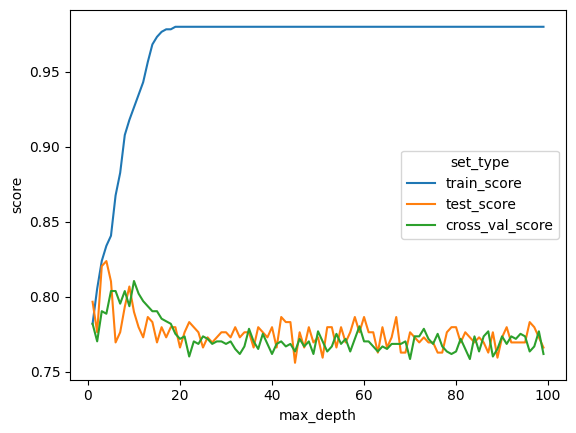

In [82]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [92]:
scores_data_long.loc[scores_data_long.set_type == 'cross_val_score'] #max_depth=10

scores_data_long.loc[scores_data_long.loc[scores_data_long.set_type == 'cross_val_score'].score.idxmax()]

max_depth                 10
set_type     cross_val_score
score               0.810434
Name: 207, dtype: object

In [93]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [94]:
cross_val_score(best_clf, X_test, y_test, cv=5).mean()

0.7932203389830509

In [99]:
# 2.4.12
ir_data_train = pd.read_csv("train_iris.csv", index_col=0)
ir_data_test = pd.read_csv("test_iris.csv", index_col=0)

In [104]:
X_train = ir_data_train.iloc[:, 0:4]
y_train = ir_data_train.iloc[:, -1]
X_test = ir_data_test.iloc[:, 0:4]
y_test = ir_data_test.iloc[:, -1]

In [106]:
max_depth_values = range(1, 100)

In [124]:
scores_data = pd.DataFrame()

In [125]:
rs = np.random.seed(0)
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    #mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    temp_score_data = pd.DataFrame(
        {'max_depth': [max_depth],
         'train_score': [train_score],
         'test_score': [test_score]
         #'cross_val_score': [mean_cross_val_score]
         }
    )
    scores_data = pd.concat([scores_data, temp_score_data])

In [126]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                           var_name='set_type', value_name='score')


<Axes: xlabel='max_depth', ylabel='score'>

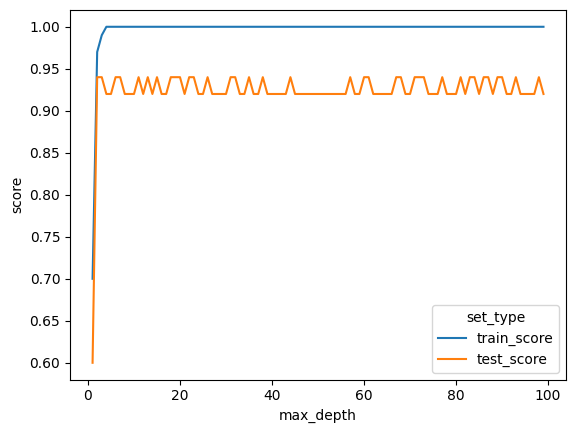

In [127]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [128]:
# 2.4.15
sdata = pd.read_csv("dogs_n_cats.csv")

In [135]:
X_train, X_test, y_train, y_test = train_test_split(sdata.iloc[:, 0:5], sdata.iloc[:, -1], test_size=0.33, random_state=42) 

In [146]:
X_train.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
703,13,5.2,1,0,1
311,34,40.8,1,1,0
722,5,2.0,1,1,0
629,9,3.6,1,0,1
0,15,18.0,1,1,0


In [144]:
max_depth_values = range(1, 21)
scores_data = pd.DataFrame()

In [ ]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    mean_cv_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp = pd.DataFrame({
        'max_depth': [max_depth],
        'train_score': [train_score],
        'mean_cv_score': [mean_cv_score]
    })

    scores_data = pd.concat([scores_data, temp])
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'mean_cv_score'],
                           var_name='set_type', value_name='score')

<Axes: xlabel='max_depth', ylabel='score'>

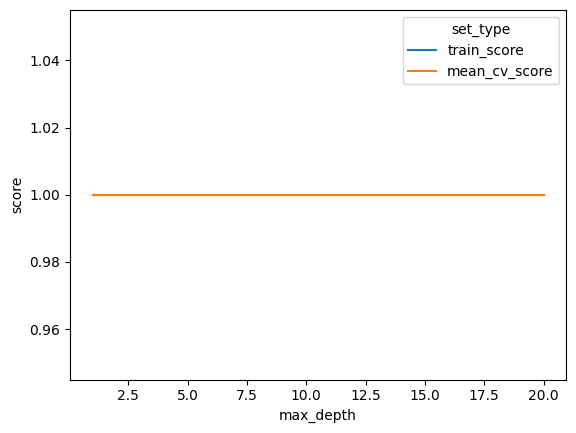

In [150]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [149]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
best_clf.fit(sdata.iloc[:, 0:5], sdata.iloc[:, -1])


DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.5, 0.75, 'Длина <= 14.5\nentropy = 1.0\nsamples = 1000\nvalue = [500, 500]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 500\nvalue = [500, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 500\nvalue = [0, 500]')]

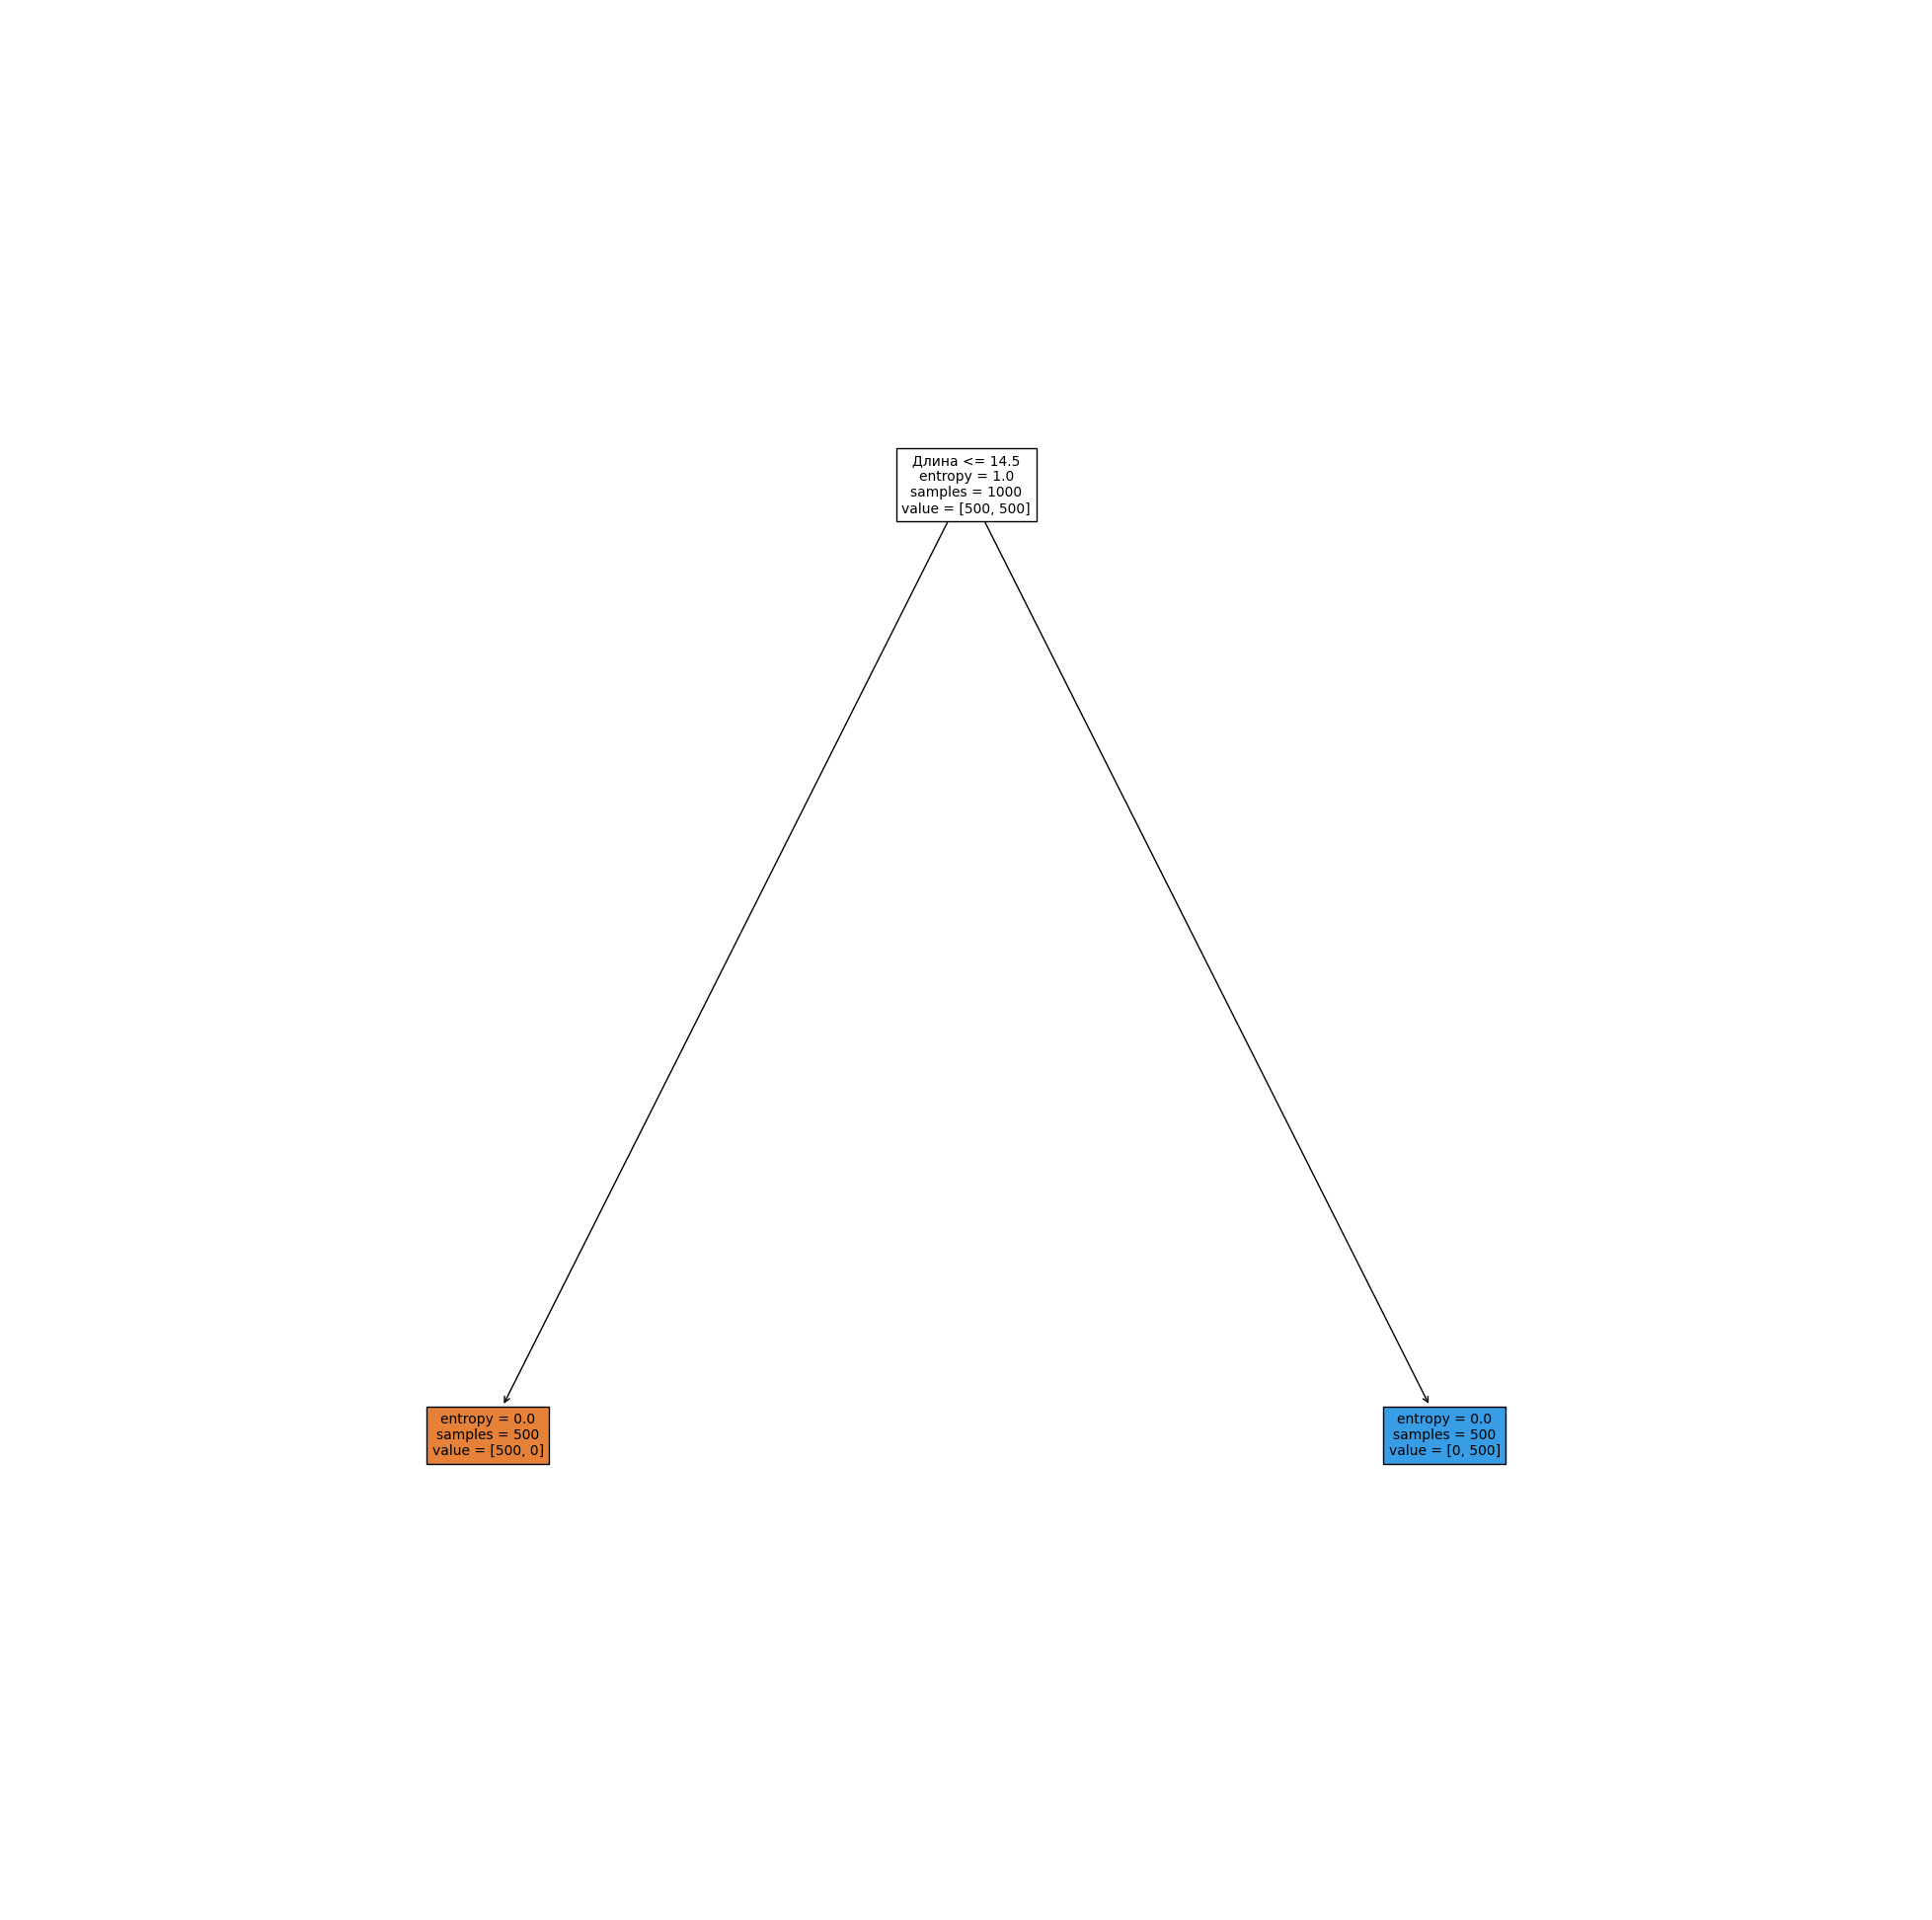

In [154]:
plt.figure(figsize=(25, 25))
tree.plot_tree(best_clf, fontsize=10, feature_names=list(sdata), filled=True)

In [160]:
X_test = pd.read_json("dataset_209691_15.txt")

In [161]:
X_test.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,21,25.2,1,1,0
1,17,20.4,1,1,0
2,28,33.6,1,1,0
3,25,30.0,1,1,0
4,23,27.6,1,1,0


In [162]:
pd.DataFrame(best_clf.predict(X_test)).value_counts()

0      
котик      60
собачка    40
Name: count, dtype: int64

In [ ]:
# 2.5.13
#import pandas as pd
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import precision_score
#clf = DecisionTreeClassifier(max_depth=20)
#clf.fit(X_train, y_train)
#predictions = clf.predict(X_test)
#precision = precision_score(predictions, y_test, average='micro')


In [163]:
from sklearn.model_selection import GridSearchCV

In [167]:
clf = tree.DecisionTreeClassifier()
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [168]:
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': range(1, 30)}

In [170]:
grid_search_cv_clf = GridSearchCV(clf, parameters, cv=5) 

In [173]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived
X = pd.get_dummies(X)
X = X.fillna({'Age': X.Age.median()})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [174]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [177]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [178]:
best_clf = grid_search_cv_clf.best_estimator_

In [182]:
best_clf.score(X_test, y_test)

0.7966101694915254

In [190]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [184]:
y_pred = best_clf.predict(X_test)

In [187]:
precision_score(y_test, y_pred)

0.8125

In [189]:
recall_score(y_test, y_pred)

0.65

In [191]:
f1_score(y_test, y_pred)

0.7222222222222222

In [192]:
2*0.8125*0.65/(0.8125+0.65)

0.7222222222222223

In [11]:
# 2.7.2
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(max_depth=5, min_samples_split=5)

In [4]:
# 2.7.3
df = pd.read_csv("data/train_data_tree.csv")
clf = DecisionTreeClassifier(criterion='entropy',) #max_depth=5, min_samples_split=5

0.119


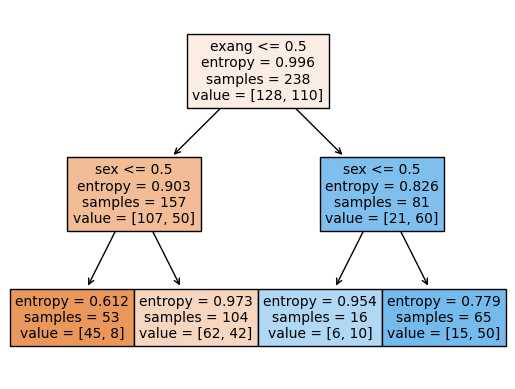

In [17]:
clf.fit(X=df.drop('num', axis=1), y=df['num'])
plot_tree(clf, fontsize=10, feature_names=list(df.drop('num', axis=1)), filled=True)
IG = round(0.996 - 0.826 * 81/238 - 0.903 * 157/238, 3)
print(IG)

In [35]:
# 2.7.4
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
dt = DecisionTreeClassifier(criterion='entropy',)
dt.fit(X=X_train, y=y_train)
predicted = dt.predict(X=X_test)

In [36]:
# 2.7.10
# максимальная глубина - от 1 до 10 уровней
# минимальное число проб для разделения - от 2 до 10
# минимальное число проб в листе - от 1 до 10

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target
parameters = {'max_depth': range(1, 11), 'min_samples_split': range(2, 11), 'min_samples_leaf': range(1, 11)}
dt = DecisionTreeClassifier()
search = GridSearchCV(dt, parameters)
search.fit(X, y)
best_tree = search.best_estimator_

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_leaf': range(1, 11),
                         'min_samples_split': range(2, 11)})

In [41]:
# 2.7.11
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target
parameters = {'max_depth': range(1, 11), 'min_samples_split': range(2, 11), 'min_samples_leaf': range(1, 11)}
dt = DecisionTreeClassifier()
search = RandomizedSearchCV(dt, parameters)
search.fit(X, y)
best_tree = search.best_estimator_

In [ ]:
# 2.7.12
parameters = {'max_depth': range(1, 11), 'min_samples_split': range(2, 11), 'min_samples_leaf': range(1, 11)}
dt = DecisionTreeClassifier()
search = GridSearchCV(dt, parameters)
search.fit(train.drop('y', axis=1), train.y)
best_tree = search.best_estimator_
predictions = best_tree.predict(X=test)

In [ ]:
# 2.7.13
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y, predictions)